# Understanding the Data

In [2668]:
import numpy as np
import pandas as pd

In [2669]:
#importing the dataset
data = pd.read_csv(r'C:\Users\kejri\OneDrive\Desktop\MLOps\Learning ML from Basics\Projects\Students Social Media Addiction\data\Students Social Media Addiction.csv')

In [2670]:
#checking the shape of the dataset
print("The shape of the Data is: ", data.shape, "\n")

The shape of the Data is:  (705, 13) 



In [2671]:
#viewing the first 5 rows and random 5 rows of the dataset
data.head()
# data.sample(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [2672]:
#getting the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [2673]:
#checking for missing values
data.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [2674]:
#getting the statistical measures about the dataset
data.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


The data belongs to the age group 18 to 24 years 

In [2675]:
#checking for duplicate values
data.duplicated().sum()

np.int64(0)

In [2676]:
#finding the correlation between the columns
data_corr = data[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night','Mental_Health_Score']]
print(data_corr.corr())

                            Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
Age                    1.000000              -0.113682               0.125265   
Avg_Daily_Usage_Hours -0.113682               1.000000              -0.790582   
Sleep_Hours_Per_Night  0.125265              -0.790582               1.000000   
Mental_Health_Score    0.160278              -0.801058               0.707439   

                       Mental_Health_Score  
Age                               0.160278  
Avg_Daily_Usage_Hours            -0.801058  
Sleep_Hours_Per_Night             0.707439  
Mental_Health_Score               1.000000  


# EDA

A. Univariate Analysis : Performing the analysis in each column individually to find the types of values, need for transformation or not and to find the outliers.  

In [2677]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style="darkgrid",
    palette="muted6",
    font_scale=1.1,
    font= "Tahoma"
)

1. Categorical Data

In [2678]:
data_categorial = data.select_dtypes(include=['object'])
print(data_categorial.nunique())

Gender                            2
Academic_Level                    3
Country                         110
Most_Used_Platform               12
Affects_Academic_Performance      2
Relationship_Status               3
dtype: int64


C:\Users\kejri\AppData\Local\Temp\ipykernel_22012\1201893475.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Most Used Platform')

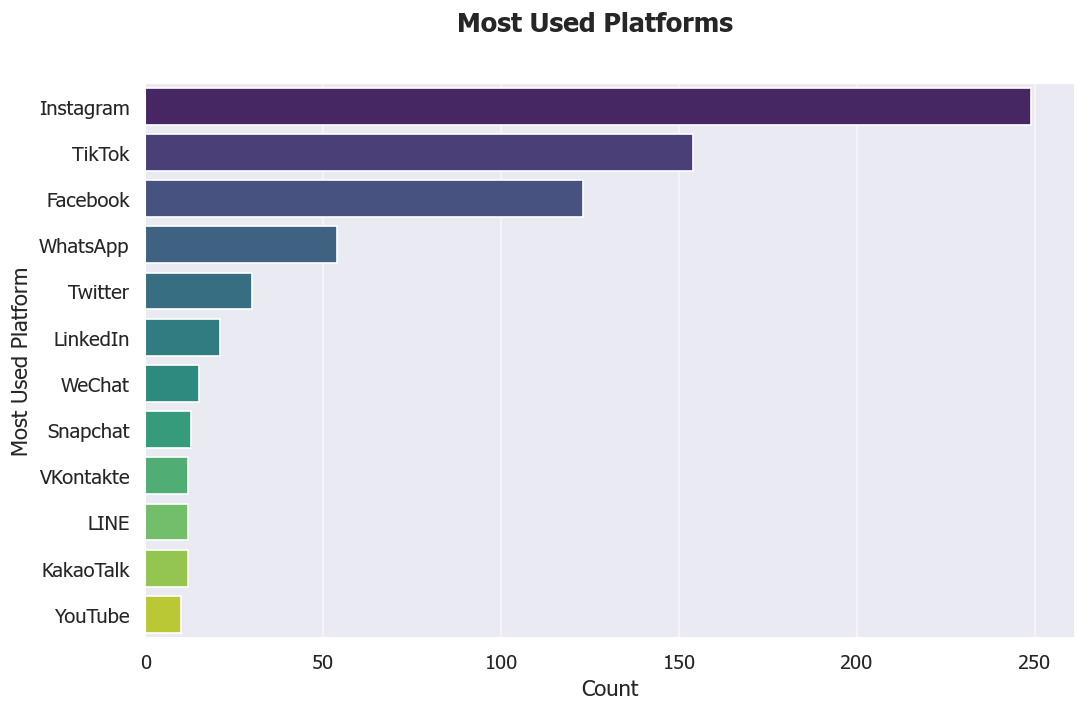

In [2679]:
#Counterplot for Most Used Platform
plt.suptitle('Most Used Platforms', fontsize=16, fontweight = "bold")

sns.countplot(data['Most_Used_Platform'], palette='viridis', order=data['Most_Used_Platform'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Most Used Platform")

<Axes: title={'center': 'Relationship Status Distribution'}, ylabel='count'>

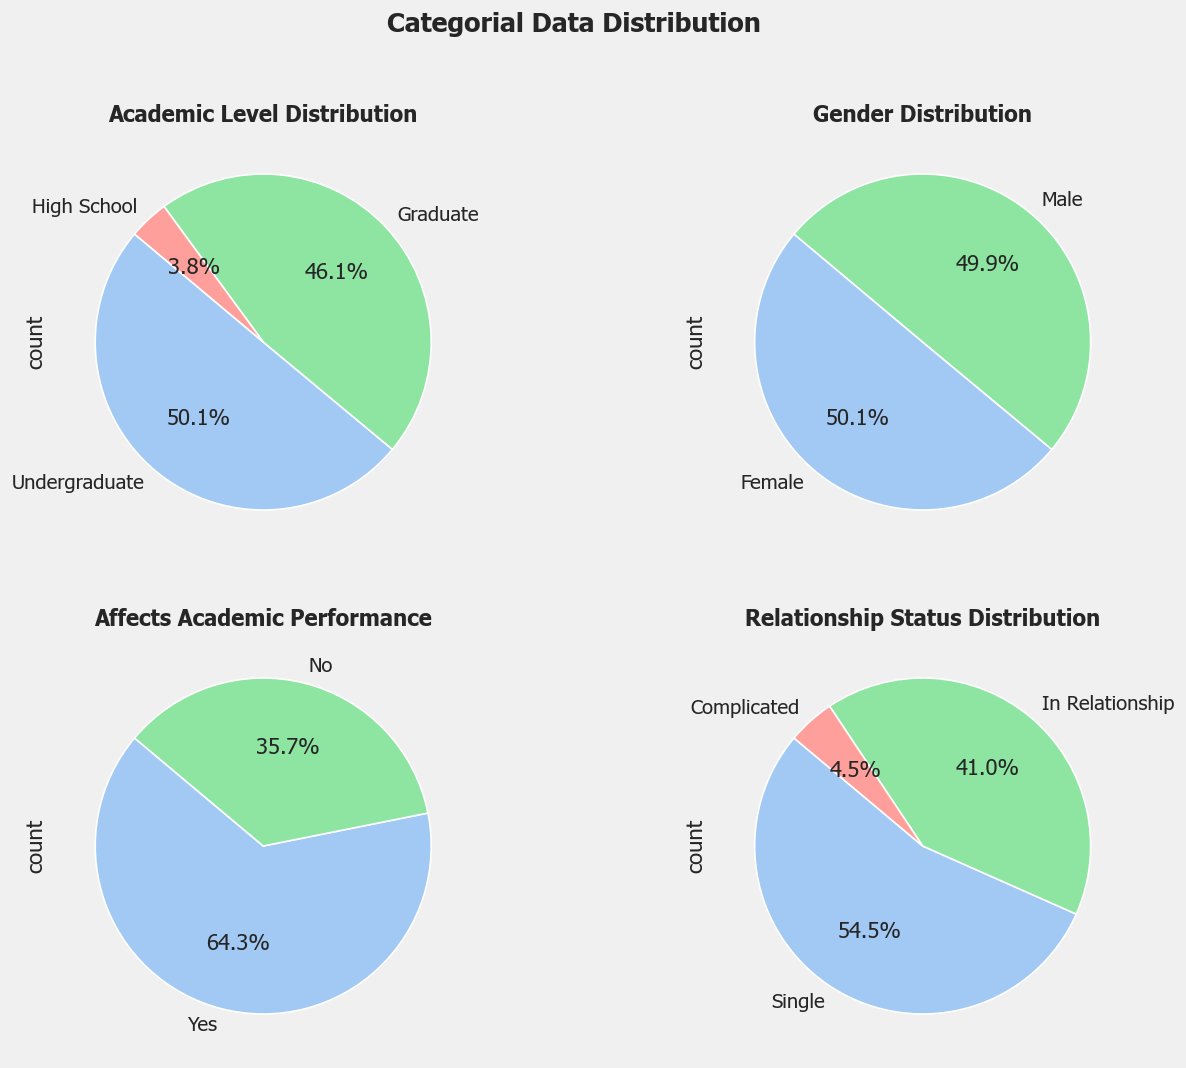

In [2736]:
#Pie chart for Categorial Data Distribution
fig = plt.figure(figsize=(13, 10))
axes = fig.subplots(2, 2)
fig.patch.set_facecolor("#F0F0F0FF")

plt.suptitle('Categorial Data Distribution', fontsize=16, fontweight = "bold")

axes[0,0].set_title('Academic Level Distribution')
data['Academic_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel6'), ax=axes[0,0])

axes[0,1].set_title('Gender Distribution')
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel6'), ax=axes[0,1])

axes[1,0].set_title('Affects Academic Performance')
data['Affects_Academic_Performance'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel6'), ax=axes[1,0])

axes[1,1].set_title('Relationship Status Distribution')
data['Relationship_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel6'), ax=axes[1,1])

2. Numerical Data

In [2681]:
data_categorial = data.select_dtypes(include=['int', 'float'])
print(data_categorial.nunique())

Student_ID                     705
Age                              7
Avg_Daily_Usage_Hours           67
Sleep_Hours_Per_Night           59
Mental_Health_Score              6
Conflicts_Over_Social_Media      6
Addicted_Score                   8
dtype: int64


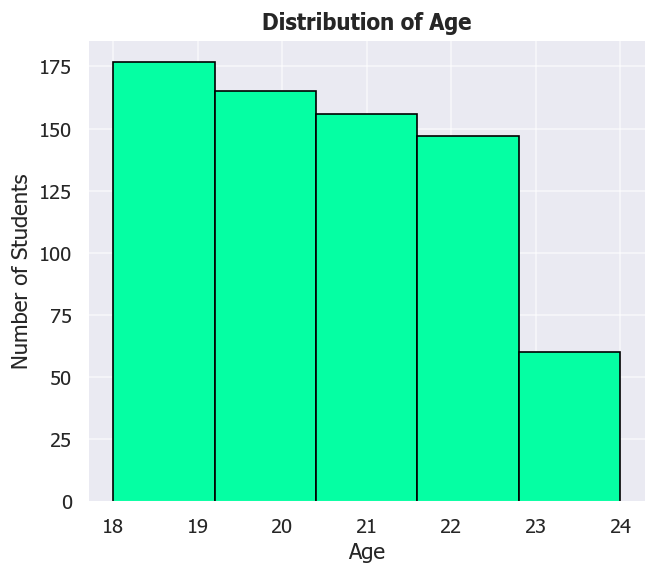

In [2744]:
#Histogram for distribution of Age
fig= plt.figure(figsize=(6,5))
plt.hist(data['Age'], bins=5, color= "#05FFA3FF" , edgecolor='black')
plt.title('Distribution of Age', fontweight = "bold")
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.show()

<Figure size 1080x720 with 0 Axes>

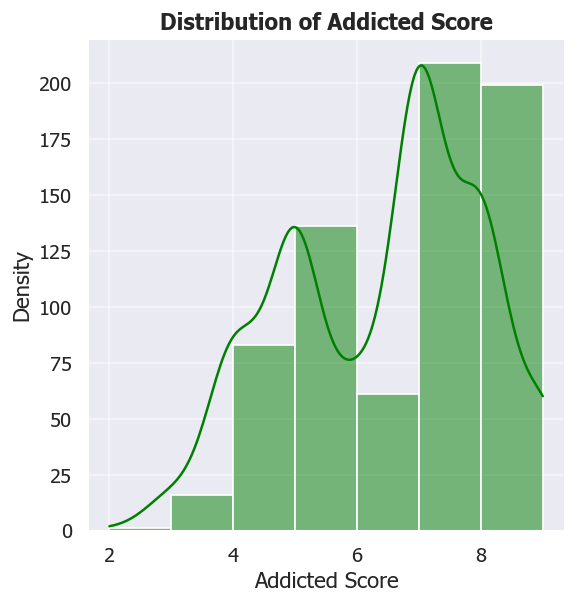

In [2683]:
#DistPlot for Addicted Score Distribution
fig= plt.figure(figsize=(9,6))
sns.displot(data['Addicted_Score'], kde=True, bins=7, color='Green')
plt.title('Distribution of Addicted Score', fontweight = "bold")
plt.xlabel('Addicted Score')
plt.ylabel('Density')
plt.show()

Text(0.5, 0, 'Conflicts')

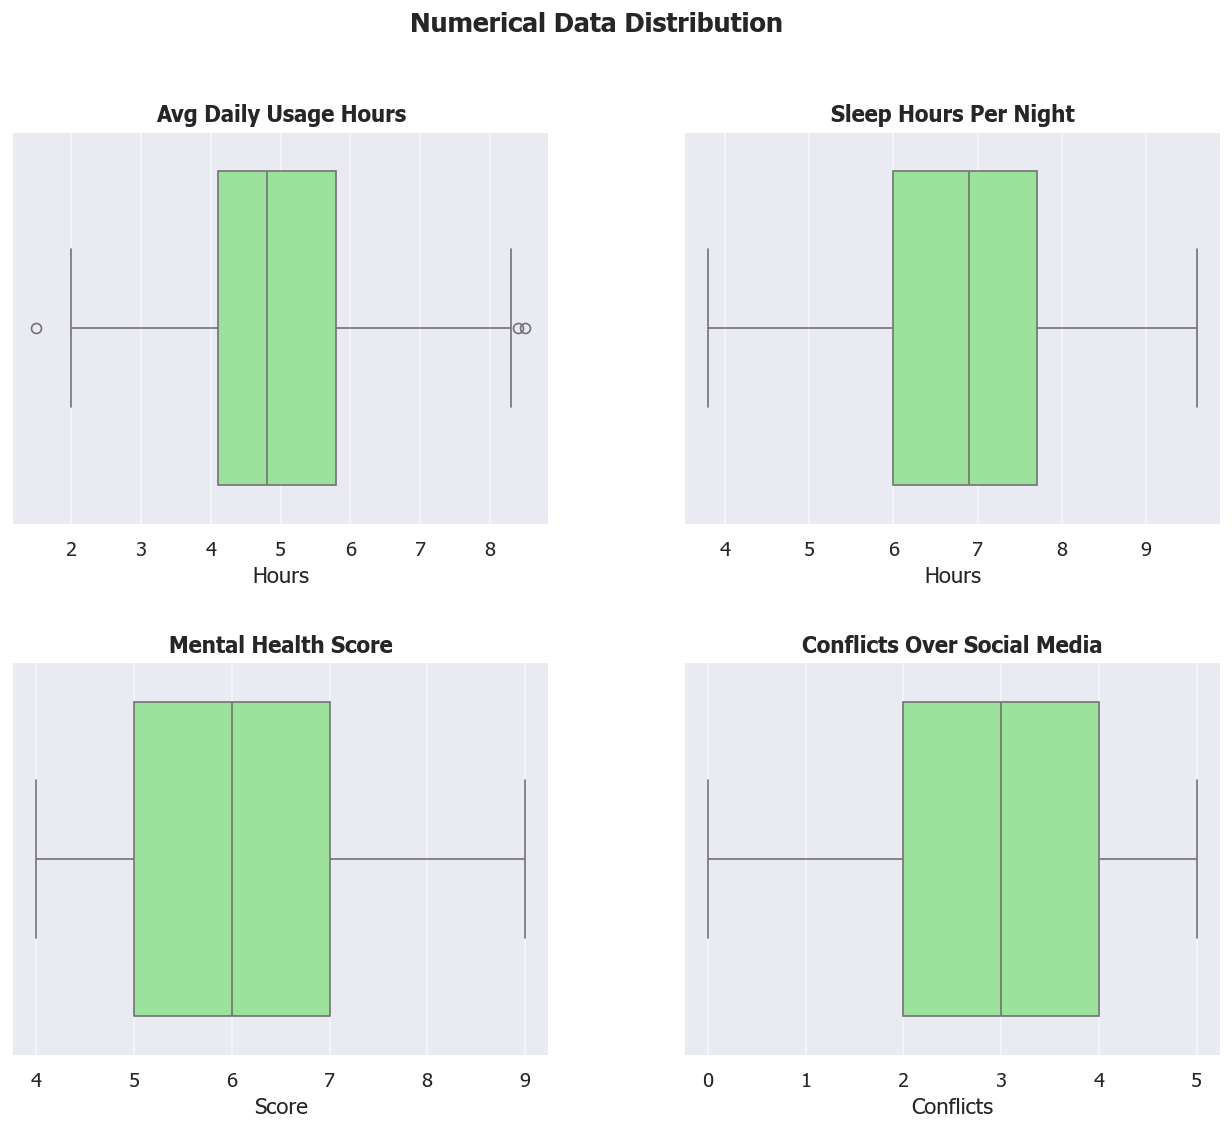

In [2740]:
#Boxplot for Numerical Data Distribution 
fig= plt.figure(figsize=(13,10))
axes = fig.subplots(2,2)
plt.suptitle('Numerical Data Distribution', fontsize=16, fontweight = "bold")
plt.subplots_adjust(hspace=0.35, wspace=0.25)

sns.boxplot(x=data['Avg_Daily_Usage_Hours'], color='lightgreen', ax=axes[0,0])
axes[0,0].set_title('Avg Daily Usage Hours')
axes[0,0].set_xlabel('Hours')

sns.boxplot(x=data['Sleep_Hours_Per_Night'], color='lightgreen', ax=axes[0,1])
axes[0,1].set_title('Sleep Hours Per Night')
axes[0,1].set_xlabel('Hours')

sns.boxplot(x=data['Mental_Health_Score'], color='lightgreen', ax=axes[1,0])
axes[1,0].set_title('Mental Health Score')
axes[1,0].set_xlabel('Score')

sns.boxplot(x=data['Conflicts_Over_Social_Media'], color='lightgreen', ax=axes[1,1])
axes[1,1].set_title('Conflicts Over Social Media')
axes[1,1].set_xlabel('Conflicts')

The middle line of the green box is the median(50 percentile) while the left and right are 25th and 75th percentile of the box respectively while the end lines attached to the box is 3 standard deviation of the 25th and 75th percentile values the values lie outside it are outlier. 

B. Bivariate Analysis : Performing the analysis between the columns to find the trends, correlation and hidden patterns.

In [2685]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

1. Plotting the relations between the numerical and numerical Data

Text(0, 0.5, 'Addicted Score')

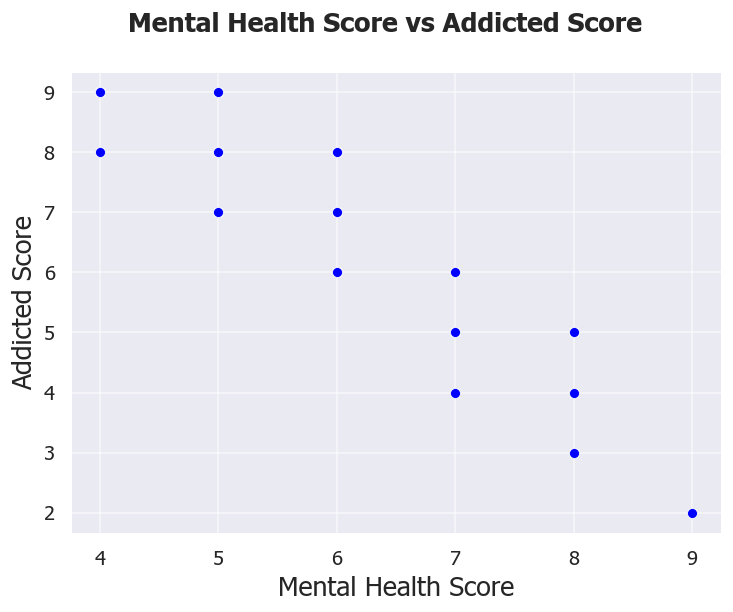

In [2686]:
fig = plt.figure(figsize=(7,5))
sns.scatterplot(x= data['Mental_Health_Score'], y = data['Addicted_Score'], color = "blue")
plt.suptitle('Mental Health Score vs Addicted Score', fontsize=16, fontweight = "bold")
plt.xlabel('Mental Health Score', fontsize=16)
plt.ylabel('Addicted Score', fontsize=16)

This plot tells us the less the person is addicted to the social media will have better mental health score.

C:\Users\kejri\AppData\Local\Temp\ipykernel_22012\2784721434.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Text(0, 0.5, 'Addicted Score')

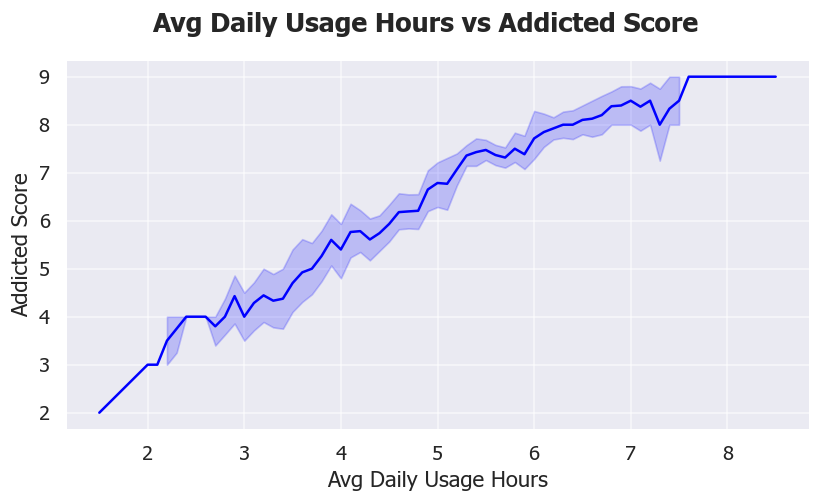

In [2687]:
fig = plt.figure(figsize=(8,4))
plt.suptitle('Avg Daily Usage Hours vs Addicted Score', fontsize=16, fontweight = "bold")
sns.lineplot(x= data['Avg_Daily_Usage_Hours'], y = data['Addicted_Score'], palette='bright6', color = 'blue')
plt.xlabel("Avg Daily Usage Hours")
plt.ylabel("Addicted Score")

2. Plotting the relations between the numerical and categorical Data

C:\Users\kejri\AppData\Local\Temp\ipykernel_22012\2130477203.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\kejri\AppData\Local\Temp\ipykernel_22012\2130477203.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\kejri\AppData\Local\Temp\ipykernel_22012\2130477203.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




[None, None, None, None]

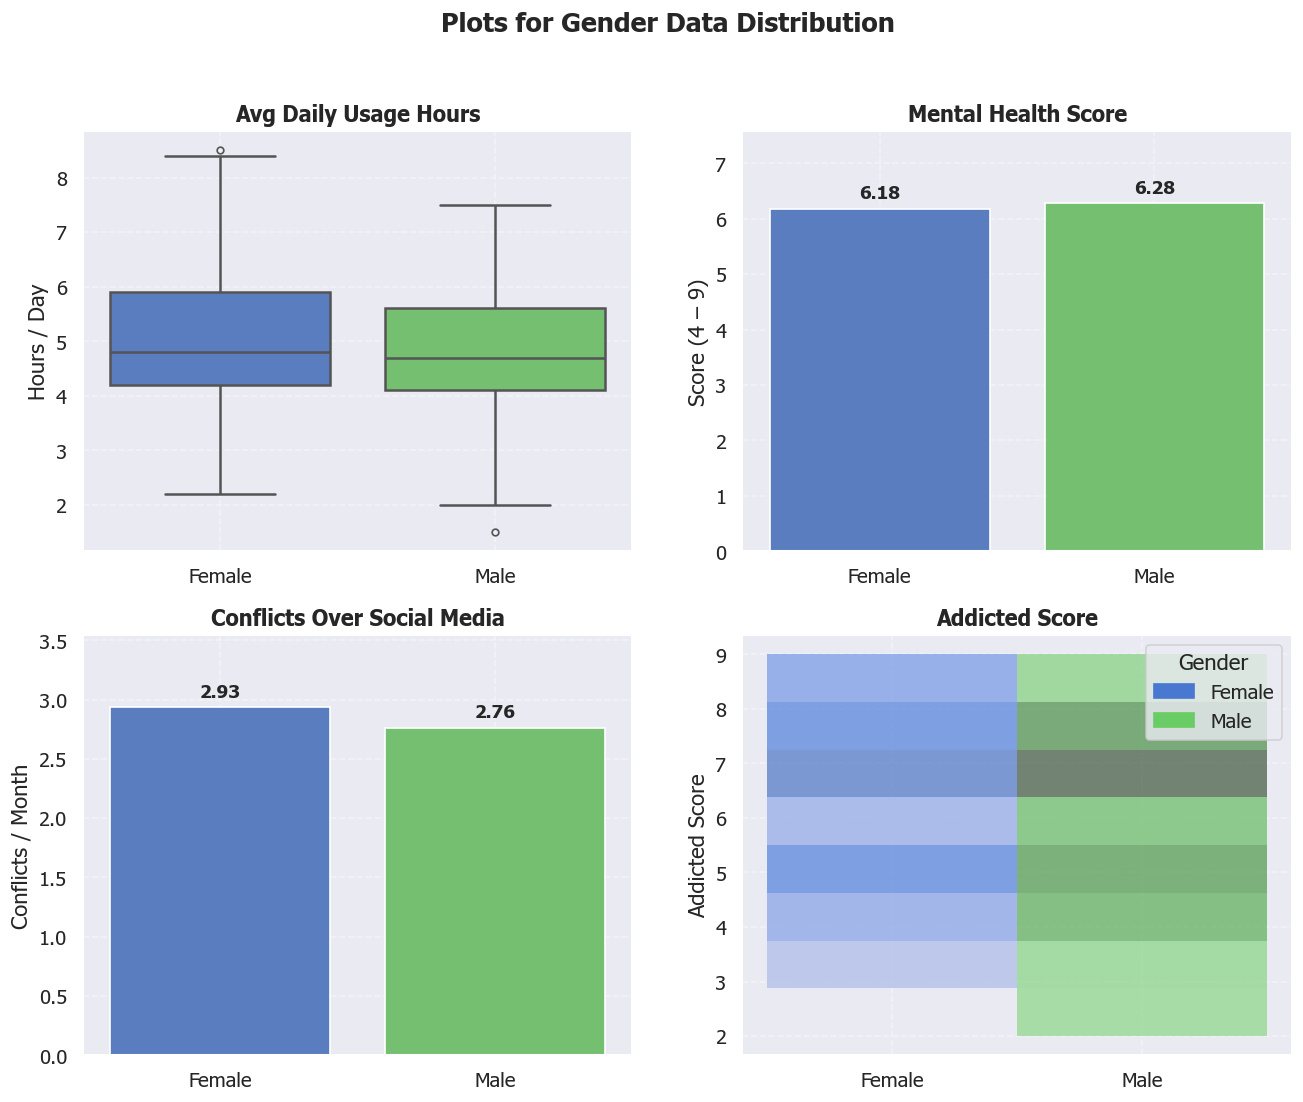

In [2688]:
fig = plt.figure(figsize=(13,10))
axes = fig.subplots(2,2)
plt.suptitle('Plots for Gender Data Distribution', fontsize=16, fontweight = "bold")

sns.boxplot(x=data['Gender'],y=data['Avg_Daily_Usage_Hours'],palette='muted6',linewidth=1.5,fliersize=4,ax=axes[0,0])
axes[0,0].set_title('Avg Daily Usage Hours',fontsize=13,fontweight='bold')
axes[0,0].set_ylabel('Hours / Day')
axes[0,0].set_xlabel('')

sns.barplot(x=data['Gender'],y=data['Mental_Health_Score'],palette='muted6',errorbar=None,ax=axes[0,1])
axes[0,1].set_title('Mental Health Score',fontsize=13,fontweight='bold')
axes[0,1].set_ylabel('Score (4 – 9)')
axes[0,1].set_xlabel('')
axes[0,1].set_ylim(0, axes[0,1].get_ylim()[1] * 1.15)
[axes[0,1].bar_label(c,fmt="%.2f",padding=4,fontsize=11,fontweight="bold") for c in axes[0,1].containers]

sns.barplot(x=data['Gender'],y=data['Conflicts_Over_Social_Media'],palette='muted6',errorbar=None,ax=axes[1,0])
axes[1,0].set_title('Conflicts Over Social Media',fontsize=13,fontweight='bold')
axes[1,0].set_ylabel('Conflicts / Month')
axes[1,0].set_xlabel('')
axes[1,0].set_ylim(0, axes[1,0].get_ylim()[1] * 1.15)
[axes[1,0].bar_label(c,fmt="%.2f",padding=4,fontsize=11,fontweight="bold") for c in axes[1,0].containers]

sns.histplot(data=data,x='Gender',y='Addicted_Score',hue='Gender',bins=8,palette='muted6',alpha=0.7,ax=axes[1,1])
axes[1,1].set_title('Addicted Score',fontsize=13,fontweight='bold')
axes[1,1].set_ylabel('Addicted Score')
axes[1,1].set_xlabel('')
[ax.grid(True,linestyle='--',alpha=0.4) for ax in axes.flat]



These Plots are showing that females are using social media more than males due to which there mental health is affected more than the males and hence they have more conflicts in the social media than the males. Eventually it suggests that females are more addicted to the social media than the males are.

C:\Users\kejri\AppData\Local\Temp\ipykernel_22012\1746974061.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\kejri\AppData\Local\Temp\ipykernel_22012\1746974061.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




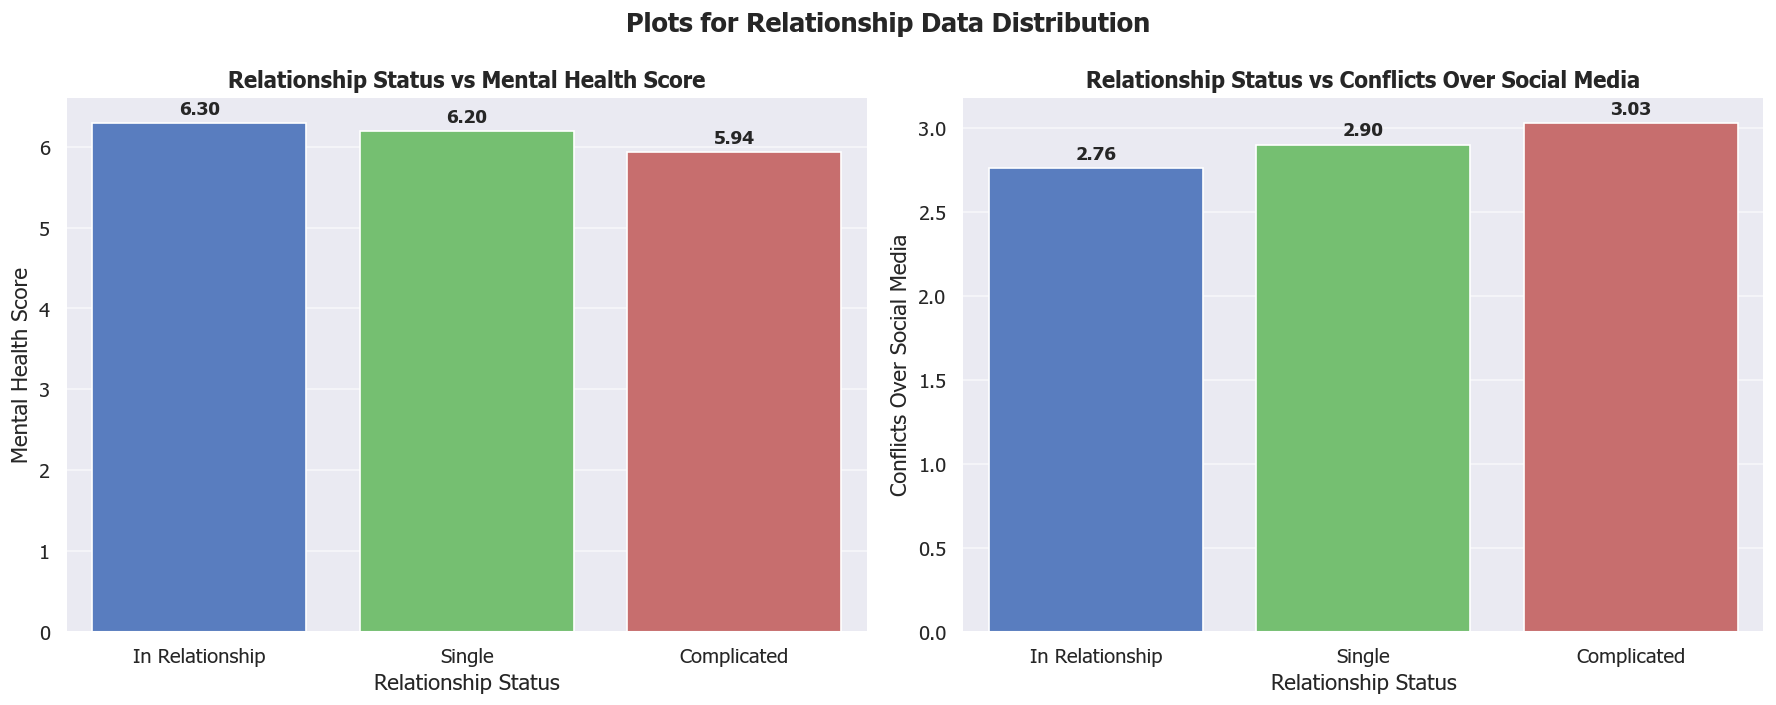

In [2689]:
fig = plt.figure(figsize=(15, 6))
axes = fig.subplots(1, 2)
plt.suptitle(
    'Plots for Relationship Data Distribution', fontsize=16, fontweight="bold")

# Plot 1
sns.barplot( x=data['Relationship_Status'], y=data['Mental_Health_Score'], palette='muted6', ax=axes[0], errorbar=None)
axes[0].set_title("Relationship Status vs Mental Health Score")
axes[0].set_xlabel("Relationship Status")
axes[0].set_ylabel("Mental Health Score")

# Add values
for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%.2f", padding=3, fontsize=11, fontweight = "bold")

# Plot 2
sns.barplot( x=data['Relationship_Status'], y=data['Conflicts_Over_Social_Media'], palette='muted6', ax=axes[1], errorbar=None)
axes[1].set_title("Relationship Status vs Conflicts Over Social Media")
axes[1].set_xlabel("Relationship Status")
axes[1].set_ylabel("Conflicts Over Social Media")

# Add values
for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.2f", padding=3, fontsize=11, fontweight = "bold")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


From these plots we can understand that if the person is in the relationship will have the better mental health and hence will have less conflicts over social media while if the person have the complicated relations than will have lower mental health and will have more conflicts over the social media.

3. Plotting the relations between the categorical and categorical Data

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'Avg_Daily_Usage_Hours'),
  Text(2.5, 0, 'Sleep_Hours_Per_Night'),
  Text(3.5, 0, 'Mental_Health_Score')])

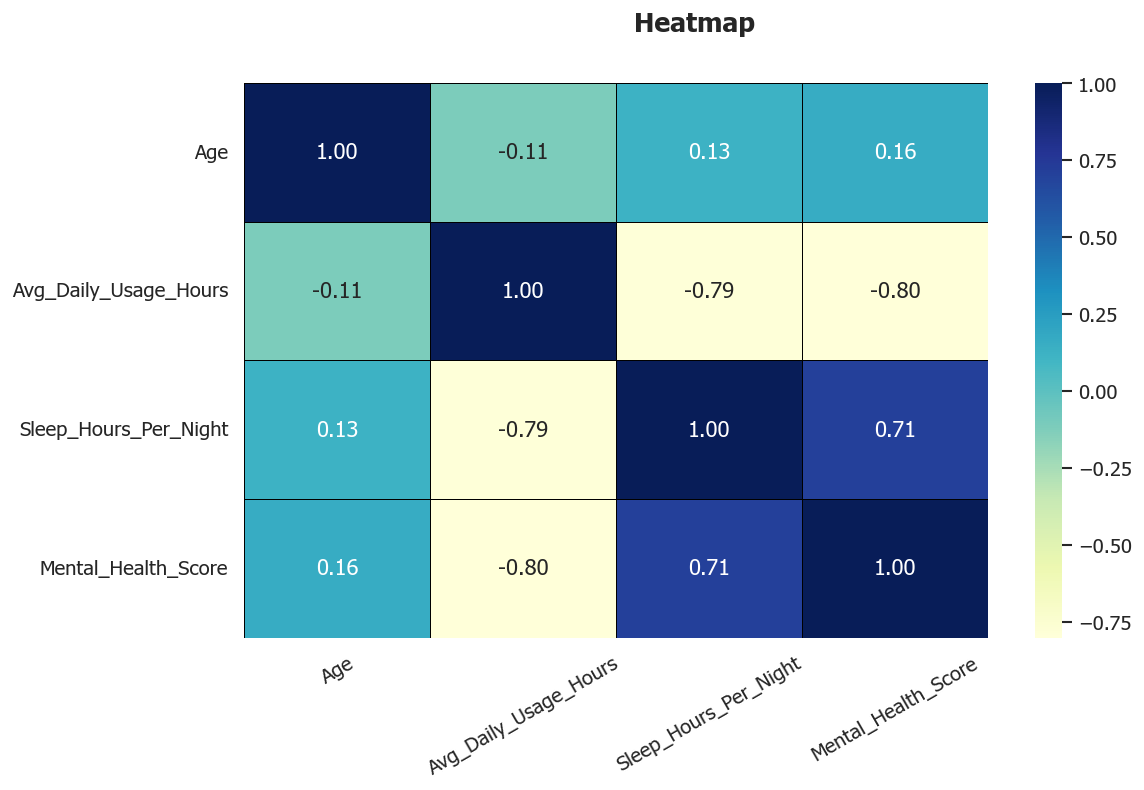

In [2690]:
plt.suptitle('Heatmap', fontsize=16, fontweight = "bold")
sns.heatmap(data=data_corr.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, linecolor='black', cbar=True)
plt.xticks(rotation=30)

<Figure size 1200x720 with 0 Axes>

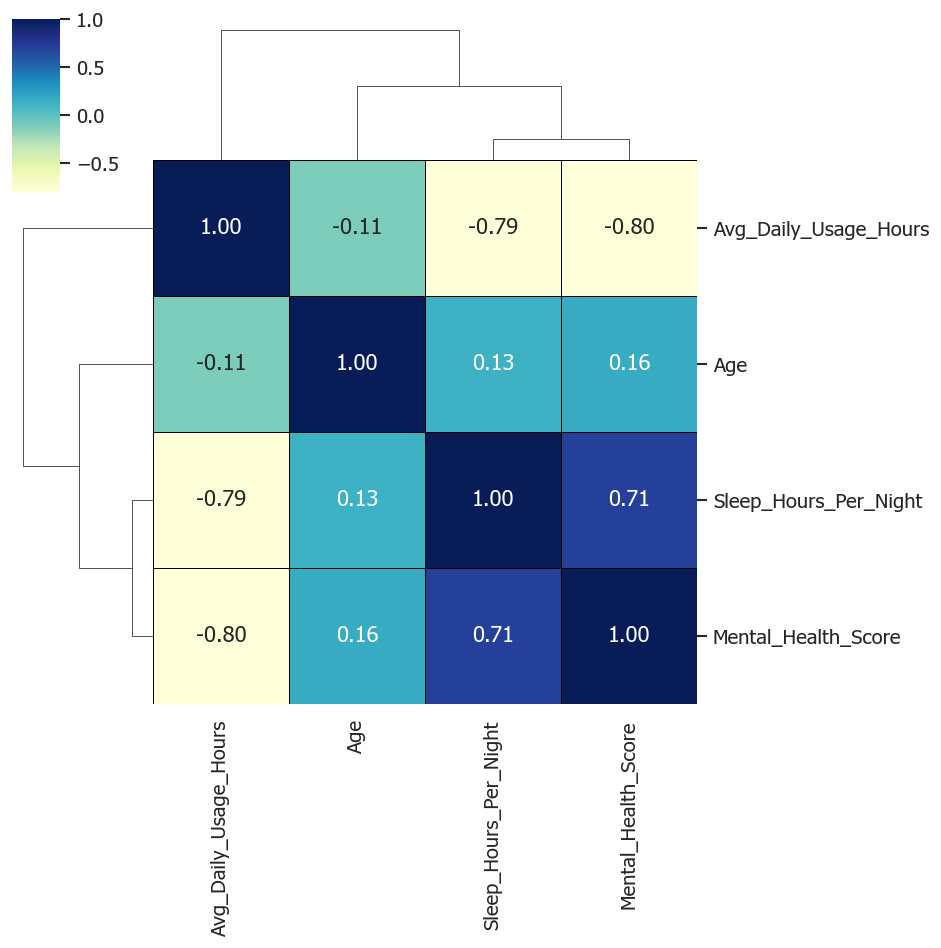

In [2691]:
plt.suptitle('Clustermap', fontsize=16, fontweight = "bold")
sns.clustermap(data=data_corr.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, linecolor='black', cbar=True, figsize=(8,8))

We can also use the pandas profiller to automatically do the EDA and show in the html format

In [2692]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data, title="Students Social Media Addiction Data Profiling Report")
# profile.to_file(r'reports\students_social_media_addiction_report.html')

# Feature Engineering

Feature Transformation is the first part in the Feature Engineering. In Feature Transformation we scale, transform, detect and remove outliers for the further processings. 

In [2693]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

1. Feature Selection

Since Country has too many values in it so it is not possible to encode them. For encoding the Country first we will decrease the no. of unique values by grouping the countries having less than 25 rows in the separate category called as 'Others'

In [2694]:
count = data['Country'].value_counts()
replace =  count[count <= 25].index 
data['Country'] = data['Country'].replace(replace, 'Others')
data['Country'].value_counts()

Country
Others         389
India           53
USA             40
Canada          34
France          27
Spain           27
Mexico          27
Denmark         27
Switzerland     27
Ireland         27
Turkey          27
Name: count, dtype: int64

Even after grouping the country column, it is too much varied and hence will be better to just drop the Country Column along with the Student ID column since it is not useful for the model

In [2695]:
data = data.drop(columns=['Student_ID', 'Country'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Avg_Daily_Usage_Hours         705 non-null    float64
 4   Most_Used_Platform            705 non-null    object 
 5   Affects_Academic_Performance  705 non-null    object 
 6   Sleep_Hours_Per_Night         705 non-null    float64
 7   Mental_Health_Score           705 non-null    int64  
 8   Relationship_Status           705 non-null    object 
 9   Conflicts_Over_Social_Media   705 non-null    int64  
 10  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 60.7+ KB


2. Feature Encoding

Now we will check for the Normality of the numerical features because the normally distributed features performs better in the linear models. After finding that we will Normalize and Scale them accordingly.

But, remember we will not normalize the output feature (Addicted Score) as it has discrete values (2 to 10) and will decrease the interpretability of the model. And, in general the output features are rarely normalized only if they are too much skewed.

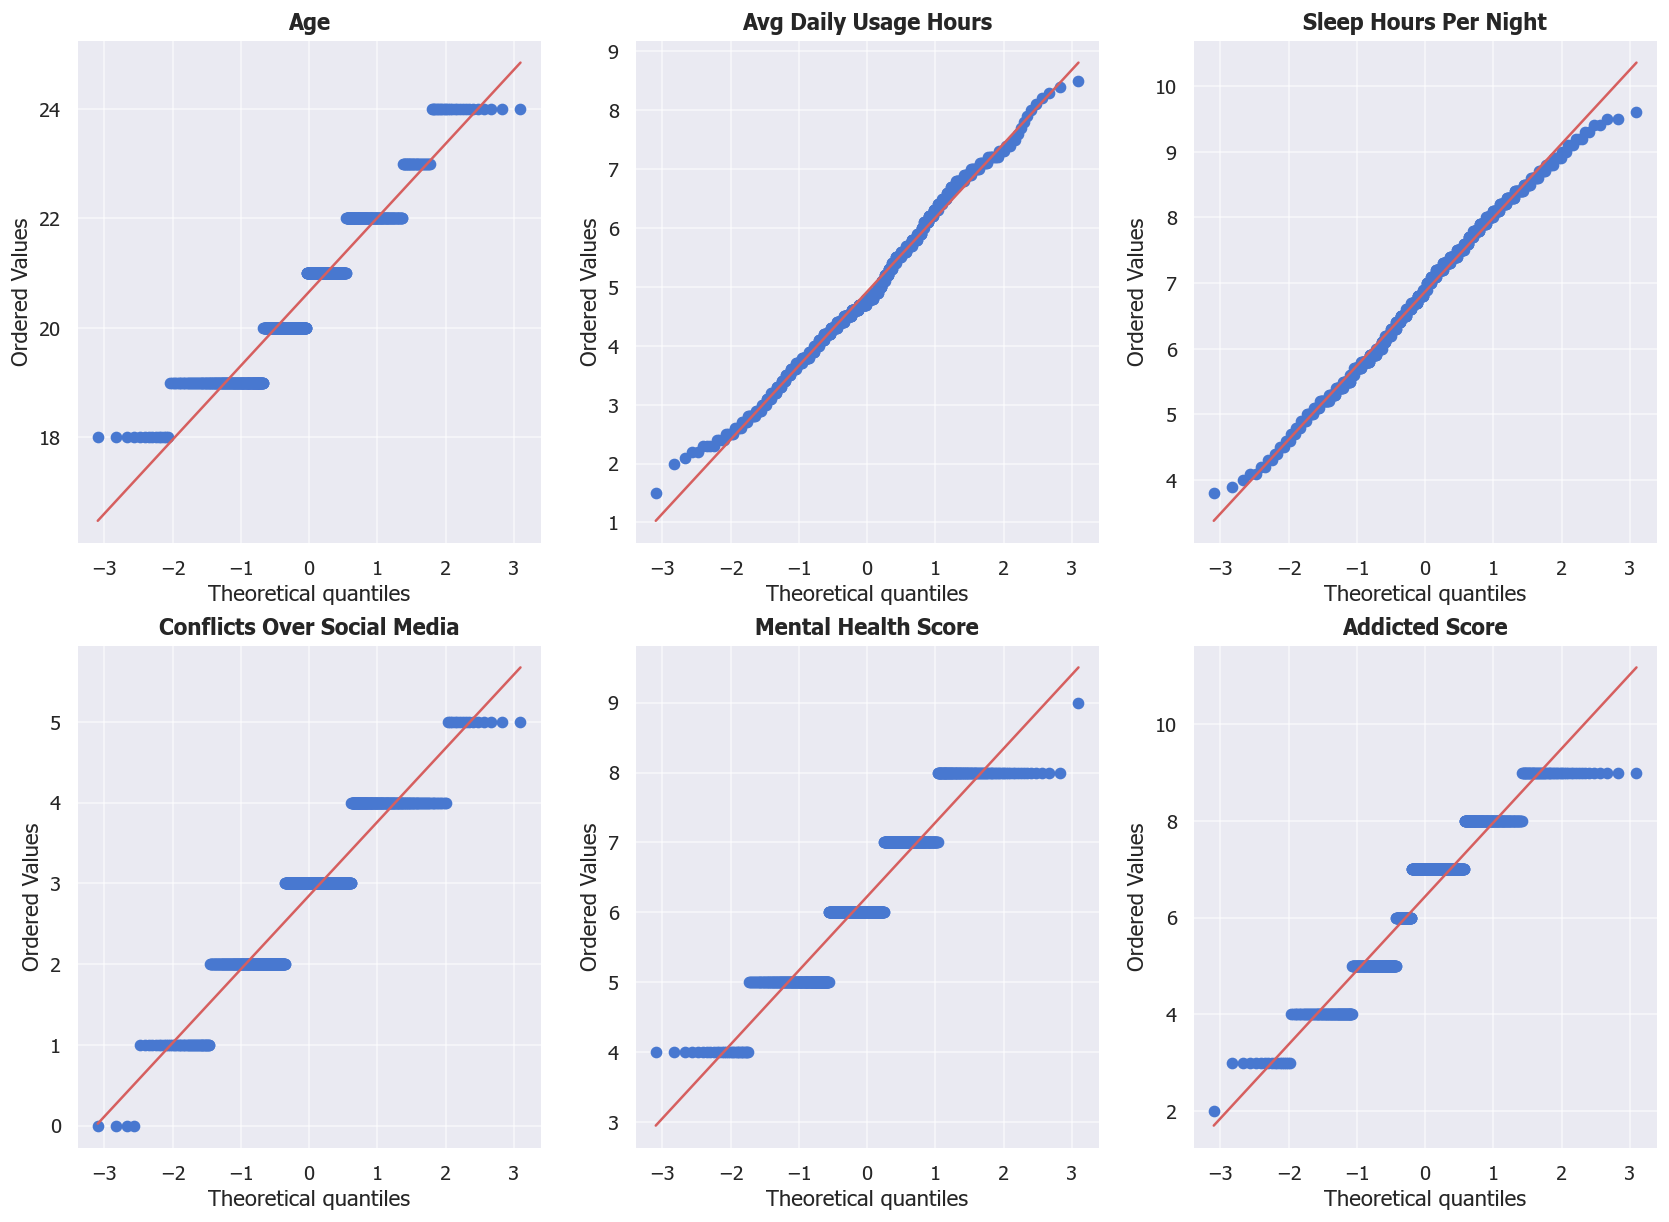

In [2696]:
import scipy.stats as stats

# Create 2x3 subplot grid properly
fig, axes = plt.subplots(2, 3, figsize=(17, 12))

stats.probplot(data['Age'], dist = 'norm', plot = axes[0,0])
axes[0, 0].set_title('Age')

stats.probplot(data['Avg_Daily_Usage_Hours'], dist = 'norm', plot = axes[0,1])
axes[0, 1].set_title('Avg Daily Usage Hours')

stats.probplot(data['Sleep_Hours_Per_Night'], dist = 'norm', plot = axes[0,2])
axes[0, 2].set_title('Sleep Hours Per Night')

stats.probplot(data['Conflicts_Over_Social_Media'], dist = 'norm', plot = axes[1,0])
axes[1, 0].set_title('Conflicts Over Social Media')

stats.probplot(data['Mental_Health_Score'], dist = 'norm', plot = axes[1,1])
axes[1, 1].set_title('Mental Health Score')

stats.probplot(data['Addicted_Score'], dist = 'norm', plot = axes[1,2])
axes[1, 2].set_title('Addicted Score')
plt.show()

After plotting we understand that the some cols are normally distributed such as daily usage hours and sleep hours while some are not normally distributed such as age, mental health score and conflicts over social media. 

Now, let's check the values of the categorical columns to convert them into the numberical columns since machine cannot understand the string/text values. 

In [2697]:
print(data['Academic_Level'].unique(), data['Academic_Level'].value_counts().unique(), "\n")
print(data['Most_Used_Platform'].unique(), data['Most_Used_Platform'].value_counts().unique(), "\n")
print(data['Relationship_Status'].unique(), data['Relationship_Status'].value_counts().unique())

['Undergraduate' 'Graduate' 'High School'] [353 325  27] 

['Instagram' 'Twitter' 'TikTok' 'YouTube' 'Facebook' 'LinkedIn' 'Snapchat'
 'LINE' 'KakaoTalk' 'VKontakte' 'WhatsApp' 'WeChat'] [249 154 123  54  30  21  15  13  12  10] 

['In Relationship' 'Single' 'Complicated'] [384 289  32]


Applying One-Hot encoding (using the pandas lib) and Label Encoding (using the replace method) to the Categorical features

In [2698]:
# # One-Hot Encoding of Categorical Columns and Dropping Unnecessary Columns having multiple unique values
# data_one_hot = pd.get_dummies(data[['Academic_Level', 'Most_Used_Platform', 'Relationship_Status']], drop_first=False, dtype=int)
# data = pd.concat([data, data_one_hot], axis=1)
# data.drop(columns= ['Student_ID', 'Most_Used_Platform', 'Academic_Level', 'Relationship_Status'], inplace=True)
# data.info()

In [2699]:
# # Label Encoding the Categorical columns to numerical values having only two unique values
# data = data.replace({'Gender': {'Male': 0, 'Female': 1}})
# data = data.replace({'Affects_Academic_Performance': {'No': 0, 'Yes': 1}})
# data.head()

Now, we will apply the encoding's using the sklearn library which are more efficient than using the pandas library for ohe and replace method for the label encoding. Here, we will apply the encodings after the train-test split.

In [2700]:
#Importing the necessary libraries and methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

ohe = OneHotEncoder(drop='first', dtype= np.int32, sparse_output=False)
le = LabelEncoder()

In [2701]:
# Now, we will split the data into the train and test data to apply the feature encoding and feature scaling to the data 
X = data.drop(columns=['Addicted_Score'])
Y = data['Addicted_Score']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.25, random_state= 42)

X_train.head()

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media
371,22,Male,Graduate,3.5,Facebook,No,8.3,8,In Relationship,2
176,19,Female,Undergraduate,4.9,Facebook,No,7.5,7,Single,2
399,22,Male,Graduate,4.6,TikTok,Yes,7.6,6,Single,3
215,22,Male,Graduate,4.4,Facebook,No,8.8,7,In Relationship,2
568,19,Female,Undergraduate,7.4,WhatsApp,Yes,5.4,5,In Relationship,4


In [2702]:
# # One Hot Encoder to get the actual feature names and preserve original indices.
# X_train_ohe = ohe.fit_transform(X_train[[ 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status']])
# X_test_ohe = ohe.transform(X_test[[ 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status']])

# cols_ohe = ohe.get_feature_names_out([ 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status'])

# X_train_ohe = pd.DataFrame(X_train_ohe, columns=cols_ohe, index=X_train.index)
# X_test_ohe = pd.DataFrame(X_test_ohe, columns=cols_ohe, index=X_test.index)

In [2703]:
# # Use Label Encoder to get the Gender and Affects Academic Performance column to encode them
# cols_le = ['Gender', 'Affects_Academic_Performance']

# for col in cols_le:
#     X_train[col] = le.fit_transform(X_train[col])
#     X_test[col] = le.transform(X_test[col])

In [2704]:
# # Dropping the older columns after the encoding has been done and concatenating the newer columns. 
# X_train = X_train.drop(columns=['Academic_Level', 'Most_Used_Platform', 'Relationship_Status'])
# X_test = X_test.drop(columns=['Academic_Level', 'Most_Used_Platform', 'Relationship_Status'])

# X_train = pd.concat([X_train, X_train_ohe], axis=1)
# X_test = pd.concat([X_test, X_test_ohe], axis=1)
# X_train.info()
# X_test.info()

Now, we will apply the encoding using the column Transformer to transform all the columns in a single go with the different types of the encoding methods and mathematical transformations. Let's apply mathematical transformations to the numerical columns to make them normal distributed and apply the encoding methods to the categorical columns to make them numerical columns. Here, we will use the ordinal encoder instead of the Label Encoder because Label encoder doesn't work with the column Transformer. Also, we will use the Function Transformer to apply the mathematical transformations.

In [2705]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

log_trf = FunctionTransformer(np.log1p, feature_names_out='one-to-one')
sqrt_trf = FunctionTransformer(np.sqrt, feature_names_out='one-to-one')
# reci_trf = FunctionTransformer(np.reciprocal, feature_names_out='one-to-one') #This will work opposite in this case, we will ignore this

trfs_norm= [
    ('One Hot Encoding', ohe, ['Academic_Level', 'Most_Used_Platform', 'Relationship_Status']),
    ('Ordinal Encoding', oe, ['Gender', 'Affects_Academic_Performance']),
    ('Log Transformation', log_trf, ['Conflicts_Over_Social_Media']),
    ('Square Root Transformation', sqrt_trf, ['Mental_Health_Score', 'Age']) 
]

ct = ColumnTransformer(transformers= trfs_norm, remainder= 'passthrough', verbose_feature_names_out= False) # verbose_feature_names_out= False makes the transformation automatically a pandas dataframe

# Applying the Column Transformer to the data
X_train_trf_norm = ct.fit_transform(X_train) 
X_test_trf_norm = ct.transform(X_test) 

X_train_trf_norm = pd.DataFrame(X_train_trf_norm, columns=ct.get_feature_names_out())
X_test_trf_norm = pd.DataFrame(X_test_trf_norm, columns=ct.get_feature_names_out())

X_train_trf_norm.head()
X_test_trf_norm.head()

,Academic_Level_High School,Academic_Level_Undergraduate,Most_Used_Platform_Instagram,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,...,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single,Gender,Affects_Academic_Performance,Conflicts_Over_Social_Media,Mental_Health_Score,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.098612,2.645751,4.472136,3.0,9.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.386294,2.449490,4.358899,4.8,5.7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.098612,2.645751,4.690416,2.9,7.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.386294,2.236068,4.358899,4.2,7.8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.693147,2.828427,4.690416,3.1,8.4


Let's check the normality for the transformed numerical features 

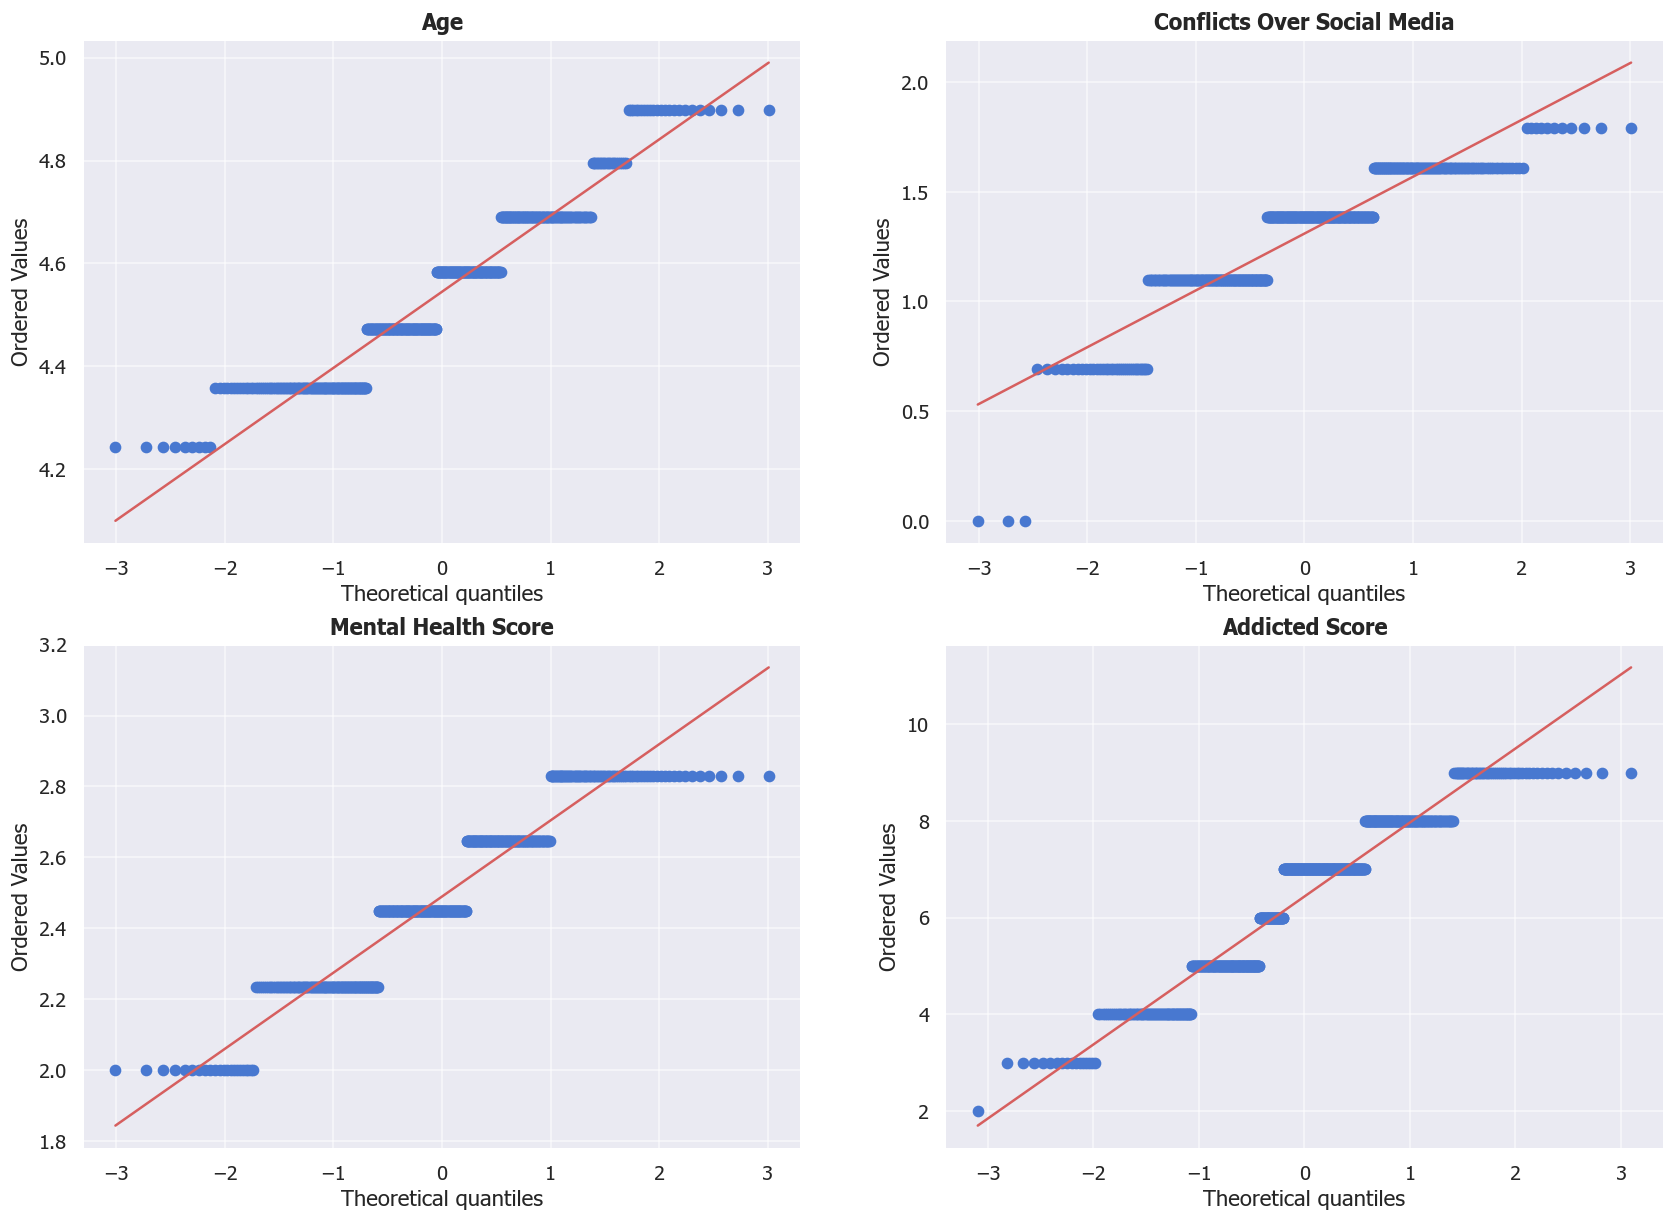

In [2706]:
# Create 2x2 subplot grid properly
fig, axes = plt.subplots(2, 2, figsize=(17, 12))

stats.probplot(X_train_trf_norm['Age'], dist = 'norm', plot = axes[0,0])
axes[0, 0].set_title('Age')

stats.probplot(X_train_trf_norm['Conflicts_Over_Social_Media'], dist = 'norm', plot = axes[0,1])
axes[0, 1].set_title('Conflicts Over Social Media')

stats.probplot(X_train_trf_norm['Mental_Health_Score'], dist = 'norm', plot = axes[1,0])
axes[1, 0].set_title('Mental Health Score')

stats.probplot(data['Addicted_Score'], dist = 'norm', plot = axes[1,1])
axes[1, 1].set_title('Addicted Score')
plt.show()

Since, the normality is same after applying the mathematical transformations, now we will apply other tranformations method like box-cox and yeo-johnson to make them normally distributed. Here, we will use the Power Transformer to apply the transformations

In [2707]:
from sklearn.preprocessing import PowerTransformer

pt_boxcox = PowerTransformer(method='box-cox')  
pt_yj = PowerTransformer()

trfs_pt= [
    ('Box-Cox Transformation', pt_boxcox, ['Age']),
    ('Yeo-Johnson Transformation', pt_yj, ['Mental_Health_Score', 'Conflicts_Over_Social_Media'])
]

ct = ColumnTransformer(transformers= trfs_pt, remainder= 'passthrough', verbose_feature_names_out= False) # verbose_feature_names_out= False makes the transformation automatically a pandas dataframe

# Applying the Column Transformer to the data
X_train_trf_norm_pt = ct.fit_transform(X_train_trf_norm) 
X_test_trf_norm_pt = ct.transform(X_test_trf_norm) 

X_train_trf_norm_pt = pd.DataFrame(X_train_trf_norm_pt, columns=ct.get_feature_names_out())
X_test_trf_norm_pt = pd.DataFrame(X_test_trf_norm_pt, columns=ct.get_feature_names_out())

X_train_trf_norm_pt.head()
X_test_trf_norm_pt.head()

,Age,Mental_Health_Score,Conflicts_Over_Social_Media,Academic_Level_High School,Academic_Level_Undergraduate,Most_Used_Platform_Instagram,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,...,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single,Gender,Affects_Academic_Performance,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night
0,-0.423817,0.682521,-0.893005,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,9.0
1,-1.280700,-0.212128,0.166647,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.8,5.7
2,0.971291,0.682521,-0.893005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.9,7.0
3,-1.280700,-1.129791,0.166647,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.2,7.8
4,0.971291,1.558907,-1.897532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.1,8.4


Since after applying the box-cox and yeo-johnson, the normality doesn't changed. We will apply the Scaling methods to scale them 

3. Feature Scaling

we will use Max Absolute Scaler to scale all the Numerical features 

In [2708]:
from sklearn.preprocessing import MaxAbsScaler

MAS = MaxAbsScaler()

trfs_mas= [
    ('MAS Transformation', MAS, ['Age', 'Mental_Health_Score', 'Conflicts_Over_Social_Media'])
]

ct = ColumnTransformer(transformers= trfs_mas, remainder= 'passthrough', verbose_feature_names_out= False) 

# Applying the Column Transformer to the data
X_train_trf_norm_mas = ct.fit_transform(X_train_trf_norm_pt) 
X_test_trf_norm_mas = ct.transform(X_test_trf_norm_pt) 

X_train_trf_norm_mas = pd.DataFrame(X_train_trf_norm_mas, columns=ct.get_feature_names_out())
X_test_trf_norm_mas = pd.DataFrame(X_test_trf_norm_mas, columns=ct.get_feature_names_out())

X_train_trf_norm_mas.head()
X_test_trf_norm_mas.head()

,Age,Mental_Health_Score,Conflicts_Over_Social_Media,Academic_Level_High School,Academic_Level_Undergraduate,Most_Used_Platform_Instagram,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,...,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single,Gender,Affects_Academic_Performance,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night
0,-0.186327,0.328491,-0.333289,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,9.0
1,-0.563048,-0.102095,0.062196,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.8,5.7
2,0.427019,0.328491,-0.333289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.9,7.0
3,-0.563048,-0.543758,0.062196,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.2,7.8
4,0.427019,0.750287,-0.708199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.1,8.4


Let's check the normality for the transformed numerical features

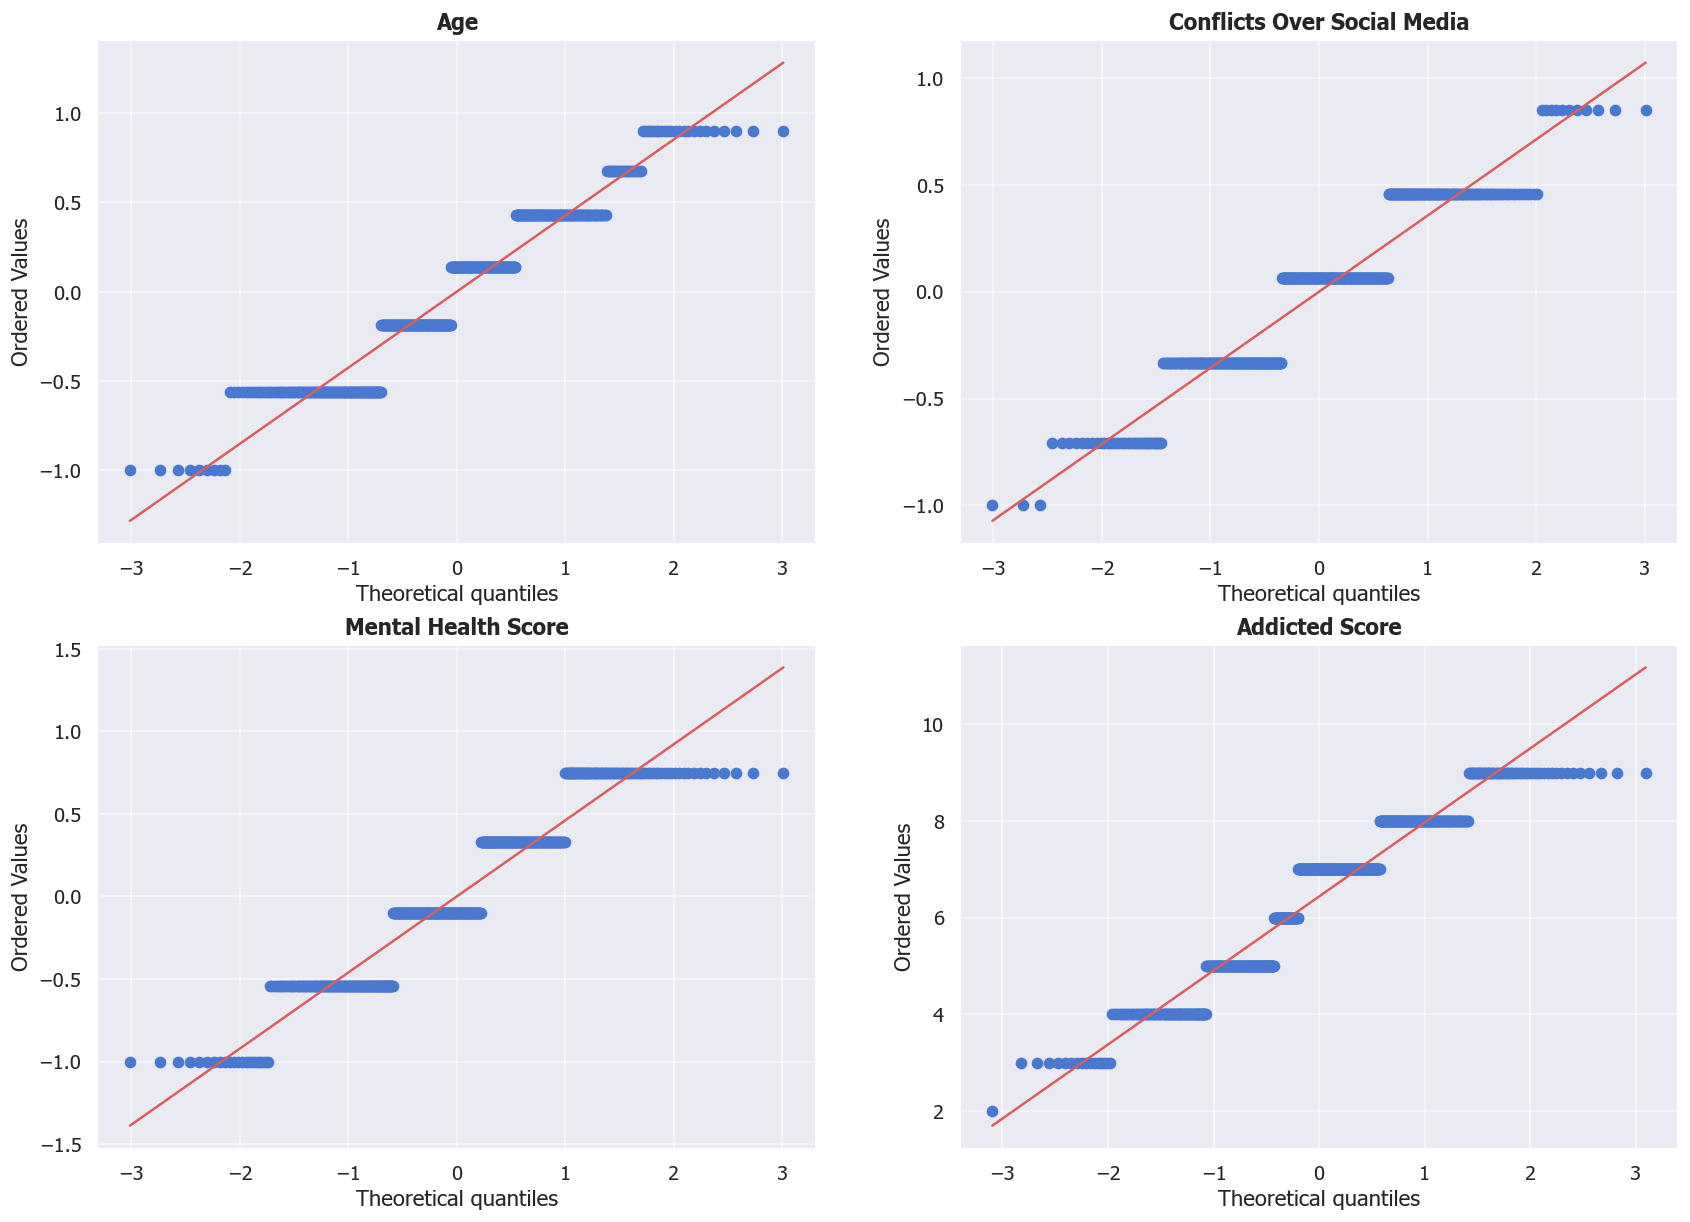

In [2709]:
# Create 2x2 subplot grid properly
fig, axes = plt.subplots(2, 2, figsize=(17, 12))

stats.probplot(X_train_trf_norm_mas['Age'], dist = 'norm', plot = axes[0,0])
axes[0, 0].set_title('Age')

stats.probplot(X_train_trf_norm_mas['Conflicts_Over_Social_Media'], dist = 'norm', plot = axes[0,1])
axes[0, 1].set_title('Conflicts Over Social Media')

stats.probplot(X_train_trf_norm_mas['Mental_Health_Score'], dist = 'norm', plot = axes[1,0])
axes[1, 0].set_title('Mental Health Score')

stats.probplot(data['Addicted_Score'], dist = 'norm', plot = axes[1,1])
axes[1, 1].set_title('Addicted Score')
plt.show()

Even after applying the Scaling, the features don't get normalized. This happened due to the fact that these features are the discrete numerical features. Discrete Numerical features have the discrete values rather than the continous values and hence they can never be normalized because even after the scalings and transformations they will have the same skewness and normalisations, hence it is better to leave them as it is and use the models which dont assume them to be normalised like trees based models.

4. Detection and Removal of the outliers in the dataset: 

There are three methods to detect the outliers and to treat them we will use the two frequently used methods, Trimming and Capping. So let's detect the outliers using the detection techniques.

In [2710]:
print(X_train_trf_norm_mas.columns.to_list(), "\n")
out_cols = ["Age", "Mental_Health_Score", "Conflicts_Over_Social_Media", "Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night"]

for cols in out_cols:
    print("The skewness of the", cols, "is:", X_train_trf_norm_mas[cols].skew())  

['Age', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Academic_Level_High School', 'Academic_Level_Undergraduate', 'Most_Used_Platform_Instagram', 'Most_Used_Platform_KakaoTalk', 'Most_Used_Platform_LINE', 'Most_Used_Platform_LinkedIn', 'Most_Used_Platform_Snapchat', 'Most_Used_Platform_TikTok', 'Most_Used_Platform_Twitter', 'Most_Used_Platform_VKontakte', 'Most_Used_Platform_WeChat', 'Most_Used_Platform_WhatsApp', 'Most_Used_Platform_YouTube', 'Relationship_Status_In Relationship', 'Relationship_Status_Single', 'Gender', 'Affects_Academic_Performance', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night'] 

The skewness of the Age is: 0.030069800005659716
The skewness of the Mental_Health_Score is: -0.03541523738285722
The skewness of the Conflicts_Over_Social_Media is: -0.09048173619903917
The skewness of the Avg_Daily_Usage_Hours is: 0.16691899325149195
The skewness of the Sleep_Hours_Per_Night is: -0.08157593555125665


General Rule of Skewness Interpretation:-  

Approximately Normal : -0.5 to +0.5,  
Moderately skewed : -1 to -0.5 or +0.5 to +1,  
Highly skewed : < -1 or > +1   

and skewed value < 0 then left skewed and value > 0 is right skewed

All the above features are lying in the range of normal, but for the sake of the experimenting all the methods i will treat the "Avg_Daily_Usage_Hours" column as skewed.

1. Using Z-score: It is used when the data is normally distributed and we want to detect the outliers in it. 

In [2711]:
Z_score_cols = ["Age", "Mental_Health_Score", "Conflicts_Over_Social_Media", "Sleep_Hours_Per_Night"]

for cols in Z_score_cols:
    max_allowed = (X_train_trf_norm_mas[cols].mean() + 3*X_train_trf_norm_mas[cols].std())
    min_allowed = (X_train_trf_norm_mas[cols].mean() - 3*X_train_trf_norm_mas[cols].std())
    print("The max allowed of ", cols ," is:", max_allowed)
    print("The min allowed of ", cols ," is:", min_allowed)
    print(X_train_trf_norm_mas[(X_train_trf_norm_mas[cols] > max_allowed) | (X_train_trf_norm_mas[cols] < min_allowed)])

The max allowed of  Age  is: 1.320173105747917
The min allowed of  Age  is: -1.3201731057478499
Empty DataFrame
Columns: [Age, Mental_Health_Score, Conflicts_Over_Social_Media, Academic_Level_High School, Academic_Level_Undergraduate, Most_Used_Platform_Instagram, Most_Used_Platform_KakaoTalk, Most_Used_Platform_LINE, Most_Used_Platform_LinkedIn, Most_Used_Platform_Snapchat, Most_Used_Platform_TikTok, Most_Used_Platform_Twitter, Most_Used_Platform_VKontakte, Most_Used_Platform_WeChat, Most_Used_Platform_WhatsApp, Most_Used_Platform_YouTube, Relationship_Status_In Relationship, Relationship_Status_Single, Gender, Affects_Academic_Performance, Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night]
Index: []

[0 rows x 22 columns]
The max allowed of  Mental_Health_Score  is: 1.4452402579247303
The min allowed of  Mental_Health_Score  is: -1.4452402579247583
Empty DataFrame
Columns: [Age, Mental_Health_Score, Conflicts_Over_Social_Media, Academic_Level_High School, Academic_Level_Undergraduate, Mos

As there are no outliers in all of the above cols so we will focus on rest of the cols

2. Using IQR: It is used when the data is skewed and we want to detect the outliers in it. 

As the skew value of "Avg_Daily_Usage_Hours" col is 0.167, so it is right skewed  

In [2712]:
percentile25 = data["Avg_Daily_Usage_Hours"].quantile(0.25)
percentile75 = data["Avg_Daily_Usage_Hours"].quantile(0.75)
IQR = percentile75 - percentile25

max_allowed = (percentile75 + 1.5*IQR)
min_allowed = (percentile25 - 1.5*IQR)
print("The max allowed Avg Daily Usage Hours is:", max_allowed)
print("The min allowed Avg Daily Usage Hours is:", min_allowed)
print(X_train_trf_norm_mas[(X_train_trf_norm_mas["Avg_Daily_Usage_Hours"] > max_allowed) | (X_train_trf_norm_mas["Avg_Daily_Usage_Hours"] < min_allowed)])

The max allowed Avg Daily Usage Hours is: 8.35
The min allowed Avg Daily Usage Hours is: 1.5499999999999994
          Age  Mental_Health_Score  Conflicts_Over_Social_Media  \
364 -0.563048            -0.543758                     0.458548   

     Academic_Level_High School  Academic_Level_Undergraduate  \
364                         0.0                           1.0   

     Most_Used_Platform_Instagram  Most_Used_Platform_KakaoTalk  \
364                           1.0                           0.0   

     Most_Used_Platform_LINE  Most_Used_Platform_LinkedIn  \
364                      0.0                          0.0   

     Most_Used_Platform_Snapchat  ...  Most_Used_Platform_VKontakte  \
364                          0.0  ...                           0.0   

     Most_Used_Platform_WeChat  Most_Used_Platform_WhatsApp  \
364                        0.0                          0.0   

     Most_Used_Platform_YouTube  Relationship_Status_In Relationship  \
364                       

Since, there is one outliers in the data, lets remove them.

In [2713]:
# # Trimming: Remove outliers (keep only values within range)
# X_train_trf_norm_mas = X_train_trf_norm_mas[
#     (X_train_trf_norm_mas["Avg_Daily_Usage_Hours"] >= min_allowed) & 
#     (X_train_trf_norm_mas["Avg_Daily_Usage_Hours"] <= max_allowed)
# ]

# Capping: Replace outliers with boundary values
X_train_trf_norm_mas["Avg_Daily_Usage_Hours"] = X_train_trf_norm_mas["Avg_Daily_Usage_Hours"].clip(lower=min_allowed, upper=max_allowed)

# Applying same boundaries to the test data
X_test_trf_norm_mas["Avg_Daily_Usage_Hours"] = X_test_trf_norm_mas["Avg_Daily_Usage_Hours"].clip(lower=min_allowed, upper=max_allowed)

print(X_train_trf_norm_mas[(X_train_trf_norm_mas["Avg_Daily_Usage_Hours"] > max_allowed) | (X_train_trf_norm_mas["Avg_Daily_Usage_Hours"] < min_allowed)])
print(X_test_trf_norm_mas[(X_test_trf_norm_mas["Avg_Daily_Usage_Hours"] > max_allowed) | (X_test_trf_norm_mas["Avg_Daily_Usage_Hours"] < min_allowed)])

Empty DataFrame
Columns: [Age, Mental_Health_Score, Conflicts_Over_Social_Media, Academic_Level_High School, Academic_Level_Undergraduate, Most_Used_Platform_Instagram, Most_Used_Platform_KakaoTalk, Most_Used_Platform_LINE, Most_Used_Platform_LinkedIn, Most_Used_Platform_Snapchat, Most_Used_Platform_TikTok, Most_Used_Platform_Twitter, Most_Used_Platform_VKontakte, Most_Used_Platform_WeChat, Most_Used_Platform_WhatsApp, Most_Used_Platform_YouTube, Relationship_Status_In Relationship, Relationship_Status_Single, Gender, Affects_Academic_Performance, Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [Age, Mental_Health_Score, Conflicts_Over_Social_Media, Academic_Level_High School, Academic_Level_Undergraduate, Most_Used_Platform_Instagram, Most_Used_Platform_KakaoTalk, Most_Used_Platform_LINE, Most_Used_Platform_LinkedIn, Most_Used_Platform_Snapchat, Most_Used_Platform_TikTok, Most_Used_Platform_Twitter, Most_Used_Platform_VKontakte, 

The outlier is removed by capping it.

3. Percentile Method: In this we take the percentile value to find the outliers and treat them using the trimming and capping techniques. we generally take the 95 or 99 percentile value to find the max value and 5 or 1 percentile value to find the min value respectively. we find the values using the quantile method of pandas.

In this example, we removed outliers after the train-test split, but this is not recommended. Always remove outliers BEFORE splitting your data. When you trim outliers from X_train after splitting, the corresponding rows in y_train are not automatically removed, creating a mismatch between features and labels. This will cause errors during model training. The correct workflow is: remove outliers from the entire dataset first, then perform the train-test split to ensure your features and target remain properly aligned.

# Principal Component Analysis

PCA is a feature extraction technique used for dimensionality reduction of the data. There is two methods of applying it, one is step-by-step applying every mathematical functions in it and second one is applying directly using the sklearn library. 

In [2714]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_trf_norm_mas) 
X_test_pca = pca.transform(X_test_trf_norm_mas) 

X_train_pca  

array([[-2.2371596 , -1.12395999, -0.11140589],
       [-0.61942602,  0.92172287, -0.07232808],
       [-0.52367241, -0.12334084,  1.23099048],
       ...,
       [-0.8003353 ,  0.96781372, -0.19054803],
       [-0.78569801, -0.09946834,  1.24752273],
       [ 0.62791679, -0.56441426, -0.67547136]], shape=(528, 3))

Visualisation of the Principal Components in 2 Dimensions taking 2 PC's

In [2715]:
import plotly.express as px  

Y_train_pca = Y_train.astype(str)
fig = px.scatter(x=X_train_pca[:, 0], 
                 y=X_train_pca[:, 1], 
                 color=Y_train_pca, 
                 color_discrete_sequence=px.colors.qualitative.G10,
                 labels={'x': 'PC1', 'y': 'PC2'},
                 title='PCA - Training Data')
fig.show()

Visualisation of the Principal Components in 3 Dimensions taking 3 PC's

In [2716]:
Y_train_pca = Y_train.astype(str)
fig = px.scatter_3d(x=X_train_pca[:,0], y=X_train_pca[:,1], z=X_train_pca[:,2],
                    color=Y_train_pca)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [2717]:
# Eigen Values 
# The actual amount of variance (in original units²) explained by each principal component.
pca.explained_variance_

array([3.0216494 , 0.62804137, 0.44315397])

In [2718]:
# Eigen Vectors 
# A 2D array containing the principal component vectors (eigenvectors). Each row is a principal component, showing how the original features combine to form that component. 
pca.components_

array([[-2.74249716e-02, -2.36133718e-01,  1.78663873e-01,
         1.54951053e-02,  1.24622597e-02, -1.04652321e-02,
        -5.57223308e-04, -1.55231856e-02, -2.51913834e-02,
         3.47513685e-03,  4.88153268e-02, -4.73915471e-03,
        -7.07822322e-03, -2.55430795e-03,  5.61709758e-02,
        -2.92008022e-03,  2.00999215e-03, -6.93883125e-03,
        -1.72268114e-02,  2.03170701e-01,  7.03563482e-01,
        -6.06564494e-01],
       [-3.87136317e-01, -6.89912341e-02,  7.39682636e-02,
         2.90890826e-03,  4.78737784e-01,  2.38185942e-01,
         1.14673041e-02,  2.91279425e-02, -4.89538018e-02,
        -9.77806189e-04,  7.11744218e-02, -2.45546242e-02,
        -2.07497404e-02, -2.93192754e-02, -6.80907209e-02,
        -5.83777266e-03, -4.00512890e-01,  4.07309348e-01,
        -4.19841345e-01,  1.02195850e-01,  3.73004130e-02,
         1.56662908e-01],
       [ 2.78417519e-01, -5.84475145e-02,  5.81297995e-02,
        -1.62674253e-02, -3.42226280e-01, -1.68378954e-01,
    

In [2719]:
# The proportion (percentage) of the dataset's total variance explained by each principal component.
pca.explained_variance_ratio_

array([0.56024729, 0.11644583, 0.08216566])

Training the PCA once again to find the optimal components.

In [2720]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_trf_norm_mas) 
X_test_pca = pca.transform(X_test_trf_norm_mas) 

In [2721]:
pca.explained_variance_.shape

(22,)

In [2722]:
pca.components_.shape

(22, 22)

To Choose the Right Number of Components, we will use, explained variance ratio which shows how much variance the particular PC holds. So we will use,
The "Elbow" Rule: Look for the point where the curve flattens out or reaches a desired threshold (e.g., 90%). To find the desired components we will find the cumulative sum of the explained variances and will select the number of components where it crosses our threshold. We can plot the sum so that we can visualize how much components are needed without manually searching through the sum.

In [2723]:
np.cumsum(pca.explained_variance_ratio_)

array([0.56024729, 0.67669312, 0.75885878, 0.81830528, 0.86367871,
       0.89894591, 0.92044545, 0.93599037, 0.94910326, 0.95971851,
       0.9672129 , 0.97289446, 0.97690648, 0.98066964, 0.98411582,
       0.98719411, 0.99002481, 0.99260007, 0.99504996, 0.99715727,
       0.99887691, 1.        ])

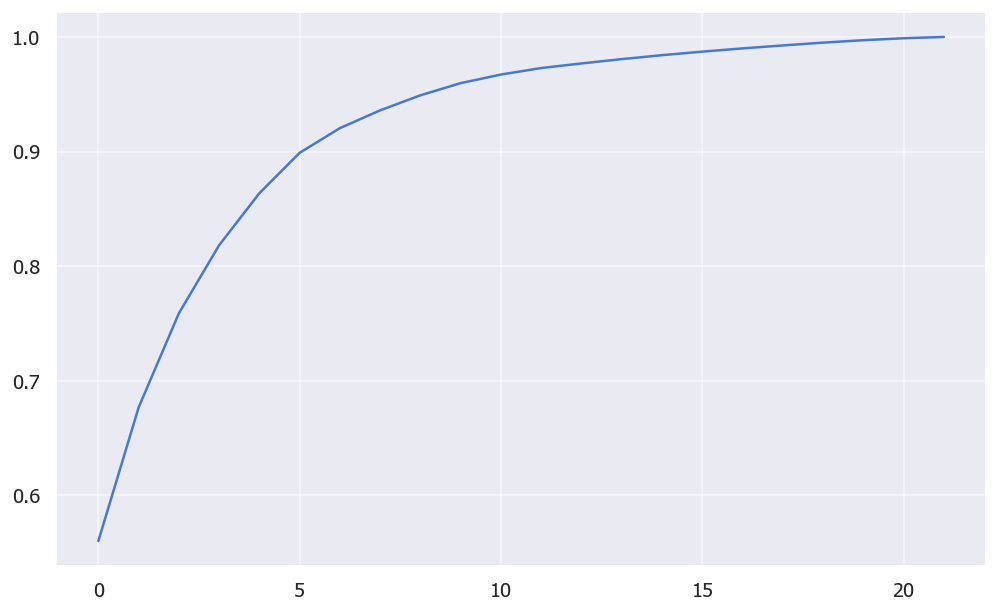

In [2724]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

By looking in the plot, you can find that after taking the 7 PC our threshold of 90% crosses so that we can proceed by just taking these 7 components only which can explain the 90%+ variance of the data. 

# Machine Learning Models 

##### Using K-Nearest Neighbour Classifier Model:

In [2725]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()

In [2726]:
# Without PCA
knn.fit(X_train_trf_norm_mas,Y_train)
Y_pred = knn.predict(X_test_trf_norm_mas)

accuracy_score(Y_test,Y_pred)

0.8361581920903954

In [2727]:
# With PCA
knn.fit(X_train_pca,Y_train)
Y_pred = knn.predict(X_test_pca)

accuracy_score(Y_test,Y_pred)

0.8361581920903954

The results of both with and without PCA are same due to the same number of the principal components as the number of the features.

We can identify the optimal number of principal components by progressively training the model with an cumulatively increasing number of PCs and evaluating accuracy at each step. This incremental approach reveals the point of diminishing returns where additional components provide minimal accuracy improvement, helping us select the minimum number of PCs needed to achieve desired model performance.

In [2728]:
for i in range(1,23):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_trf_norm_mas) 
    X_test_pca = pca.transform(X_test_trf_norm_mas) 

    knn = KNeighborsClassifier()

    knn.fit(X_train_pca,Y_train)
    Y_pred = knn.predict(X_test_pca)
    print(accuracy_score(Y_test,Y_pred))

0.5875706214689266
0.6949152542372882
0.751412429378531
0.7740112994350282
0.751412429378531
0.8022598870056498
0.7796610169491526
0.7909604519774012
0.8135593220338984
0.7966101694915254
0.807909604519774
0.807909604519774
0.8305084745762712
0.8135593220338984
0.8305084745762712
0.8248587570621468
0.8248587570621468
0.8248587570621468
0.8192090395480226
0.8192090395480226
0.8305084745762712
0.8361581920903954


##### Using Linear Models  

In [2729]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

lr = LinearRegression()
RidgeR = Ridge(alpha = 0.1)
LassoR = Lasso(alpha = 0.0013)
ElasticNetR = ElasticNet(alpha = 0.001, l1_ratio=0.3)
SGDR = SGDRegressor(loss = 'squared_error', penalty = None, eta0 = 0.01, alpha = 0.001, max_iter = 100)

# Metrics

In [2730]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2731]:
# Function to print values of all the metrics 
def printMetrics(metrics):
    for metrics_name, metrics_value in metrics.items():
        print(metrics_name, ":", f"{metrics_value:.5f}")

    print("\n")

In [2732]:
# Dictionary to store all the linear models 
models = {'LR': lr, 'Ridge': RidgeR, 'Lasso': LassoR, 'EN': ElasticNetR, 'SGDR' : SGDR}

In [2733]:
# Function to apply the different linear models to the data and print the metrics
for model_name, model in models.items():
    model.fit(X_train_pca, Y_train_pca)
    Y_pred = model.predict(X_test_pca)
    
    print("Model: ", model_name)
    print(model.coef_)
    print(model.intercept_)

    # Metrics:
    mae= mean_absolute_error(Y_test, Y_pred)
    mse= mean_squared_error(Y_test, Y_pred)
    rmse= np.sqrt(mean_squared_error(Y_test, Y_pred)) 
    r2 = r2_score(Y_test, Y_pred)
    r2_adj = 1- ((1-r2)*(X_test_pca.shape[0] - 1)/(X_test_pca.shape[0]-1-22))  

    # There is no direct way to find the r2 adj and rmse

    metrics = {"MAE: " : mae, "MSE: " : mse, "RMSE: " : rmse, "R2: " : r2, "R2_ADJ: " : r2_adj}

    printMetrics(metrics)

Model:  LR
[ 0.8107301   0.18119848  0.20030439  0.14509011  0.11012775  1.34472868
  0.11108115  0.27081158  0.10274717 -0.50632256 -0.4566693   0.56136001
 -0.2615095   0.47136491  0.16985866 -0.14236979 -0.34163305  0.18907265
  0.19718537  0.8795741  -0.6664827  -0.03229489]
6.412878787878788
MAE:  : 0.23327
MSE:  : 0.09388
RMSE:  : 0.30640
R2:  : 0.96259
R2_ADJ:  : 0.95725


Model:  Ridge
[ 0.81067919  0.18114375  0.20021866  0.1450043   0.11004242  1.34338853
  0.11089967  0.27020004  0.10247223 -0.50464998 -0.45453549  0.55790525
 -0.25923619  0.46699887  0.16814209 -0.140761   -0.33743907  0.18652442
  0.19439371  0.86513039 -0.65312045 -0.03131394]
6.412878787878788
MAE:  : 0.23315
MSE:  : 0.09378
RMSE:  : 0.30624
R2:  : 0.96263
R2_ADJ:  : 0.95730


Model:  Lasso
[ 0.81029905  0.17912463  0.19736531  0.14102778  0.10480543  1.33788119
  0.09984873  0.25527649  0.0843308  -0.48357304 -0.42444629  0.51885557
 -0.20131735  0.40719229  0.09978348 -0.06391978 -0.2563214   0.0952991

All the Linear Models applied above has given approximately the same results while the best model came out is Lasso Regression with the best R2 score of 96.299%